<a href="https://www.kaggle.com/code/zulqarnain11/rice-variety-classification-using-cnn?scriptVersionId=268535289" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dropout,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  
warnings.filterwarnings("ignore")
tf.get_logger().setLevel('ERROR')


2025-10-16 17:48:25.505799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760636905.760961      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760636905.833538      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rice-image-dataset


In [3]:
data_dir = os.path.join(path, "Rice_Image_Dataset")
os.listdir(data_dir)


['Karacadag',
 'Basmati',
 'Jasmine',
 'Rice_Citation_Request.txt',
 'Arborio',
 'Ipsala']

In [4]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset='training',
    seed=123,
    shuffle=True,

)
test_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset='validation',
    seed=123,
    shuffle=True,

)




Found 75000 files belonging to 5 classes.
Using 60000 files for training.


I0000 00:00:1760637031.793244      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [5]:
class_names = train_ds.class_names
n_classes=len(class_names)
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


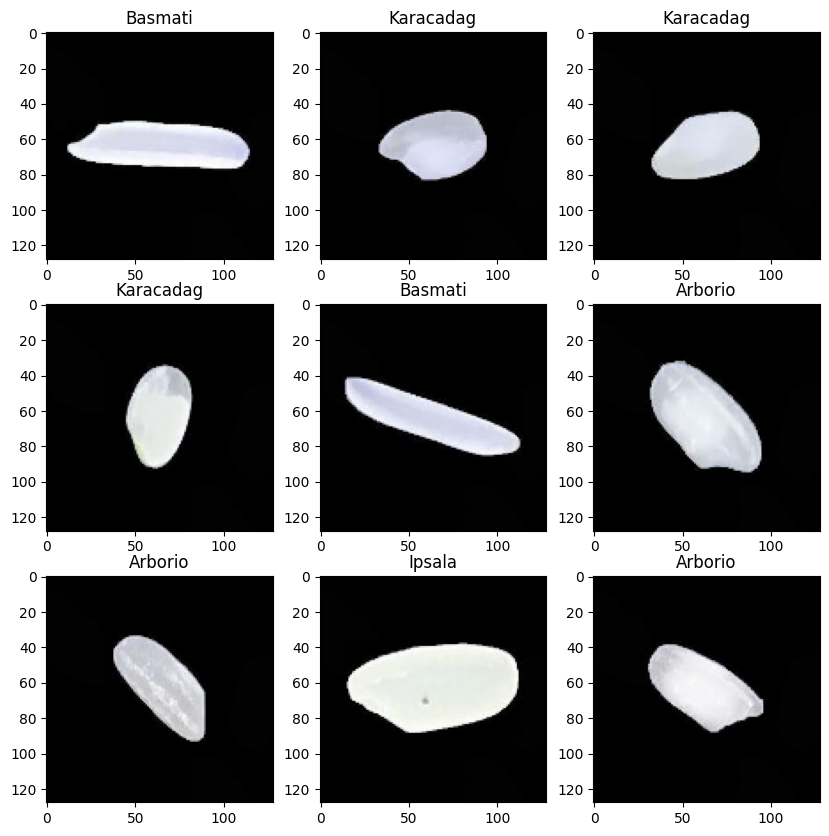

In [6]:
plt.figure(figsize=(10, 10))
for image,label in train_ds.take(1):
   for  i in range(9):
     ax=plt.subplot(3, 3, i + 1)
     plt.imshow(image[i].numpy().astype("uint8"))
     plt.title(class_names[label[i].numpy()])
plt.show()


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [8]:
train_ds=train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])


In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
history = model.fit(
    train_ds,

    epochs=10 
)


Epoch 1/10


I0000 00:00:1760637113.325218     103 service.cc:148] XLA service 0x7b4704005560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760637113.325922     103 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760637113.684196     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


  16/3750 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.3545 - loss: 1.4746

I0000 00:00:1760637116.537116     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 140s 36ms/step - accuracy: 0.9231 - loss: 0.2127
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9663 - loss: 0.1015
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9848 - loss: 0.0463
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9912 - loss: 0.0291
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9932 - loss: 0.0219
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9935 - loss: 0.0196
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9945 - loss: 0.0176
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9959 - loss: 0.0135
Epoch 9/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9965 - loss: 0.0117
Epoch 10/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9962 - loss: 0.0138


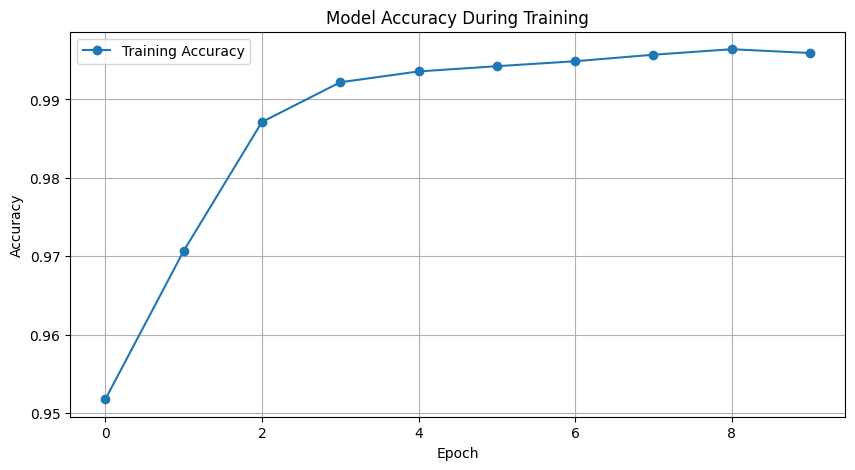

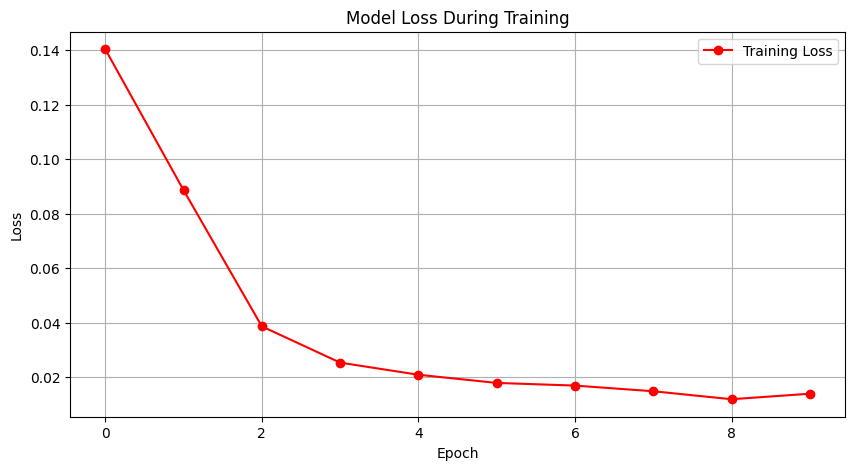

In [15]:
# Plot training accuracy and loss
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss graph
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', color='red', marker='o')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9922 - loss: 0.0353
✅ Test Accuracy: 0.9927
📉 Test Loss: 0.0314
